In [1]:
import json

matches = []

#summonerName = ['bertTheNerd', 'camen6ert']

#summonerName = ['floohooo']
summonerName = ['DarthAnimal']

with open(summonerName[0] + '.json', 'r') as f:
    mylist = list(f)

    for l in mylist:
        matches.append(json.loads(l))


QQCTxI0Sm2Yf8nAzWKfsH3cUbeyvpzTyCnxYHyne1YwZooNW


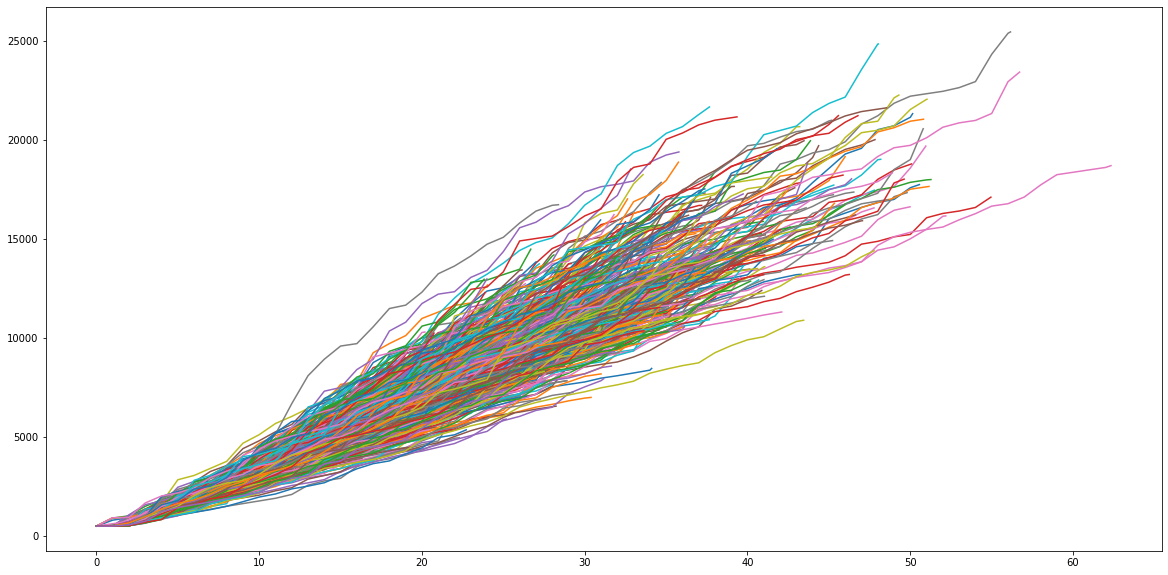

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

buf = []

#Find SummonerId
parts = matches[0]["match"]['info']["participants"]
summonerId = ""
for p in parts:
    if p["summonerName"] in summonerName:
        summonerId = p["summonerId"]
        break

print(summonerId)

for m in matches:
    if 'info' not in m["match"] or 'info' not in m['timeline']:
        continue 

    gm = m["match"]["info"]["gameMode"]
    if gm != "CLASSIC":
        continue

    parts = m["match"]['info']["participants"]
    
    for p in parts:
        if p["summonerId"] == summonerId:
            i = p["participantId"]
            break

    frames = m['timeline']['info']['frames']

    minions = []

    for frame in frames:
        minions.append((frame["timestamp"] / 60000,  frame['participantFrames'][str(i)]['totalGold']))

    buf.append(minions)


figure(figsize=(20,10))
for b in buf:
    plt.plot(*zip(*b))


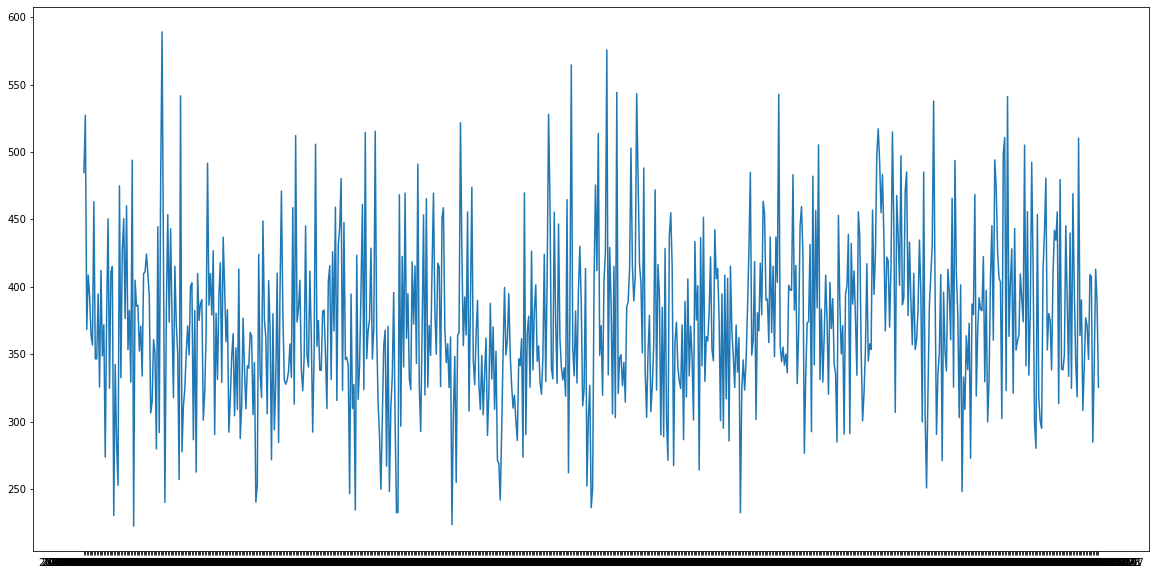

In [3]:
from datetime import datetime
val = []

for m in matches:
    if 'info' not in m["match"] or 'info' not in m['timeline']:
        continue 

    gm = m["match"]["info"]["gameMode"]
    if gm != "CLASSIC":
        continue

    parts = m["match"]['info']["participants"]
    gameStart = m["match"]['info']['gameCreation']
 
 
    gameDurationMin = m["match"]['info']['gameDuration']

    if "gameEndTimestamp" not in m["match"]['info']:
        gameDurationMin = gameDurationMin/1000

    gameDurationMin = gameDurationMin/60

    for p in parts:
        if p["summonerId"] in summonerId:
            val.append((datetime.utcfromtimestamp(gameStart/1000).strftime('%Y-%m-%d %H:%M'), p["goldEarned"]/gameDurationMin))
            continue

val = sorted(val, key=lambda tup: tup[0])
figure(figsize=(20,10))
x, y = zip(*val)
plt.plot(x,y)

In [4]:
summoner = []
i = 0
for m in matches:
    if 'info' not in m["match"] or 'info' not in m['timeline']:
        continue 


    gm = m["match"]["info"]["gameMode"]
    if gm != "CLASSIC":
        continue

    parts = m["match"]['info']["participants"]

    for p in parts:
        if p["summonerId"] == summonerId:
            summoner.append(p)

print(len(summoner))

715


<AxesSubplot:xlabel='championName'>

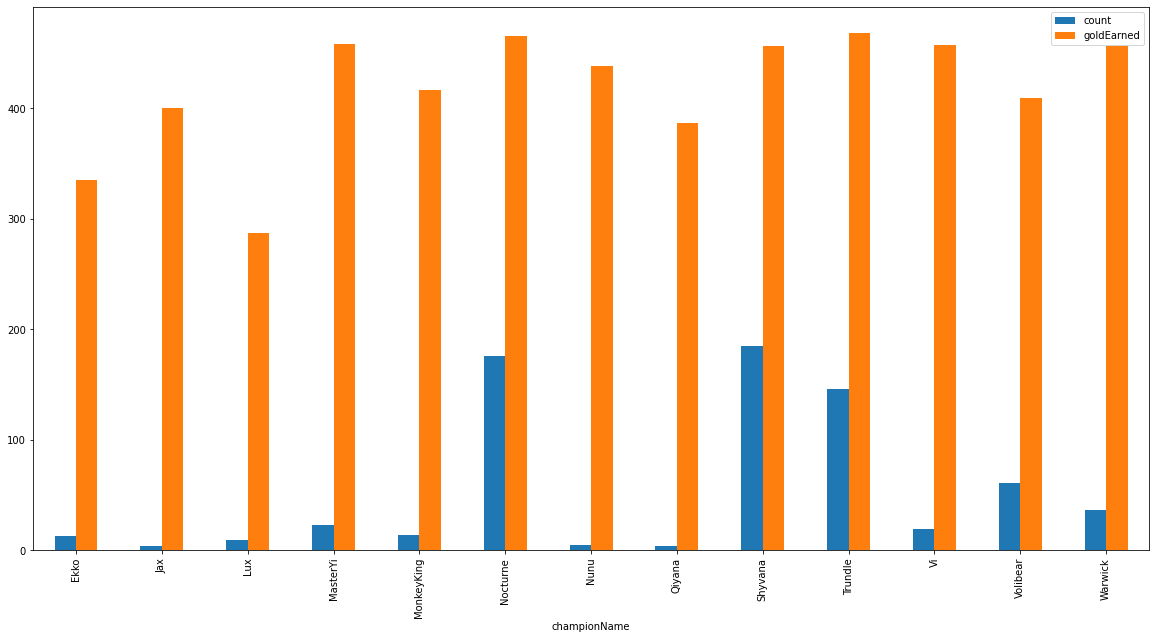

In [5]:
import pandas as pd

df = pd.DataFrame(summoner)

gameDurationMin = m["match"]['info']['gameDuration']
if "gameEndTimestamp" not in m["match"]['info']:
    gameDurationMin = gameDurationMin/1000

gameDurationMin = gameDurationMin/60

df_new = df[['championName', 'goldEarned', 'summonerName']]

dfmean = df_new.groupby('championName').agg({'championName':'size', 'goldEarned':'mean'}).rename(columns={'championName':'count','goldEarned':'goldEarned'})
dfmean = dfmean[dfmean['count'] > 3]

dfmean["goldEarned"] = dfmean["goldEarned"].div(gameDurationMin)
dfmean = dfmean

dfmean.plot.bar(figsize=(20, 10))



,count,win,winrate
championName,,,
Amumu,3,2,66.666667
Blitzcrank,1,1,100.000000
Ekko,13,8,61.538462
Heimerdinger,2,0,0.000000
Jax,4,3,75.000000
Kayn,1,0,0.000000
Leona,2,1,50.000000
Lux,9,6,66.666667
MasterYi,23,12,52.173913


<AxesSubplot:xlabel='championName'>

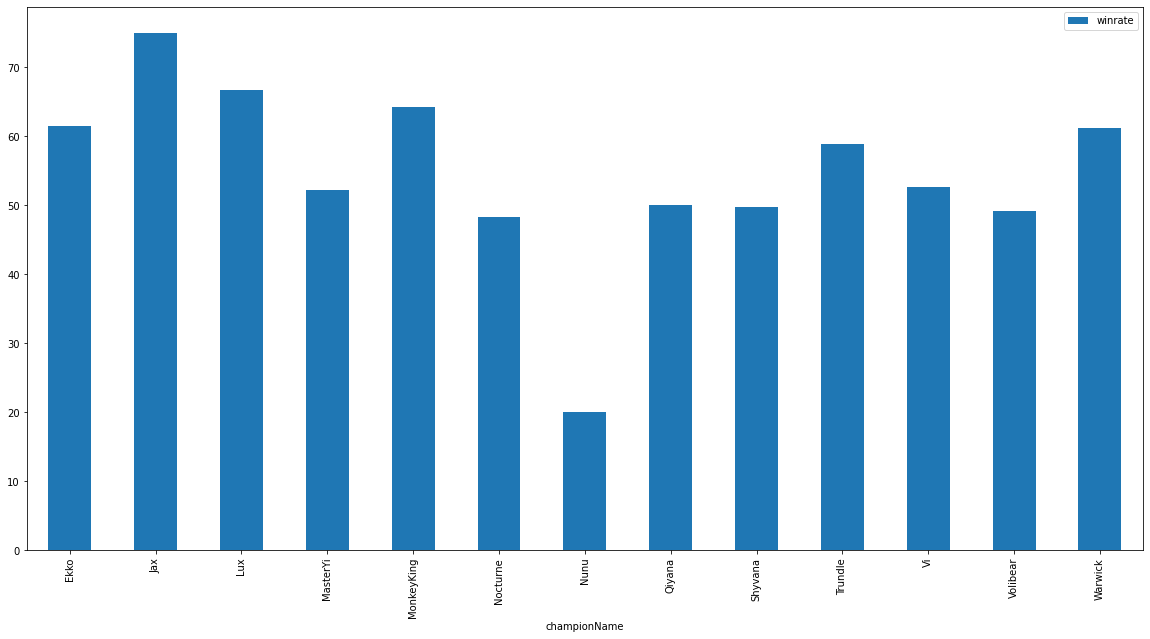

In [6]:
import pandas as pd

df = pd.DataFrame(summoner)

gameDurationMin = m["match"]['info']['gameDuration']
if "gameEndTimestamp" not in m["match"]['info']:
    gameDurationMin = gameDurationMin/1000

gameDurationMin = gameDurationMin/60

df_new = df[['championName', 'win', 'summonerName']]

dfmean = df_new.groupby('championName').agg({'championName':'size', 'win':'sum'}).rename(columns={'championName':'count','win':'win'})
dfmean["winrate"] =  dfmean['win'] * 100 / dfmean['count']
display(dfmean)
dfmean = dfmean[dfmean['count'] > 3]

dfmean["win"] = dfmean["win"].div(gameDurationMin)
dfmean = dfmean

dfmean[['winrate']].plot.bar(figsize=(20, 10))


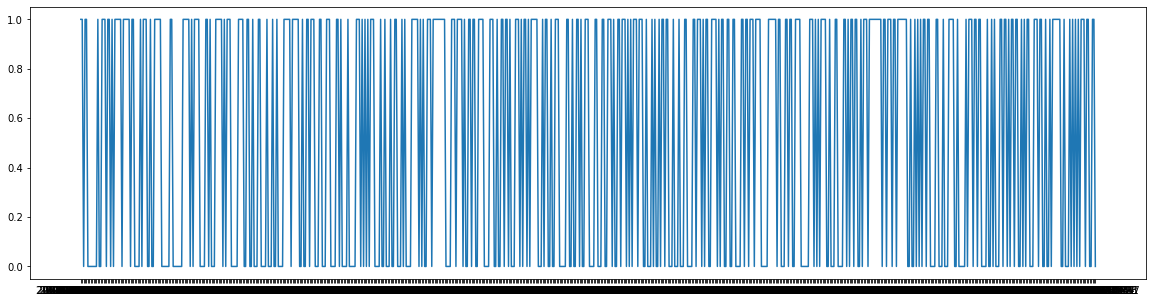

In [7]:
from datetime import datetime
val = []

for m in matches:
    if 'info' not in m["match"] or 'info' not in m['timeline']:
        continue 

    gm = m["match"]["info"]["gameMode"]
    if gm != "CLASSIC":
        continue

    parts = m["match"]['info']["participants"]
    gameStart = m["match"]['info']['gameCreation']

    for p in parts:
        if p["summonerId"] in summonerId:
            val.append((datetime.utcfromtimestamp(gameStart/1000).strftime('%Y-%m-%d %H:%M'), p["win"]))
            continue

val = sorted(val, key=lambda tup: tup[0])
figure(figsize=(20,5))
x, y = zip(*val)
plt.plot(x,y)